# Lab Week 1

In [2]:
import mkl_random
import numpy as np
import prtools as pr
import matplotlib.pyplot as plt

###  Excercise 1.6

#### Excercise 1.6a

In [3]:
x = np.random.rand(2,3)
x

array([[0.49498367, 0.15814204, 0.24810317],
       [0.90272183, 0.30105741, 0.14843245]])

#### Excercise 1.6b

In [4]:
mean = np.mean(x)
mean_2 = np.mean(x, axis = 0) # mean of cols
mean_3 = np.mean(x, axis = 1) # mean of rows

print(mean, mean_2, mean_3)

0.37557342998944604 [0.69885275 0.22959973 0.19826781] [0.30040963 0.45073723]


### Excercise 1.7

#### Excercise 1.7ab

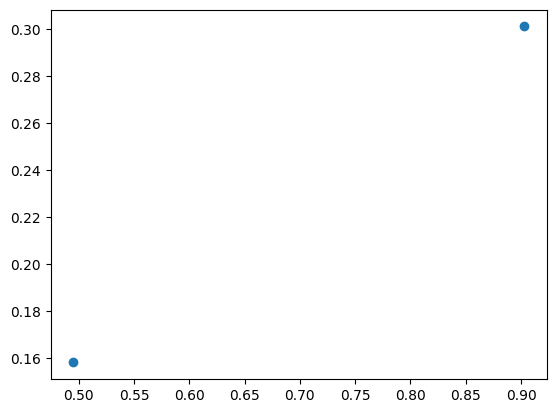

In [5]:
plt.scatter(x[:, 0], x[:, 1])

*The points seem to be positively corelated*

### Excercise 1.8

In [6]:
lab = np.array([1,2])
a = pr.prdataset(x, lab)
a

2 by 3 prdataset with 2 classes: [1 1]

### Excercise 1.9

#### Excercise 1.9a

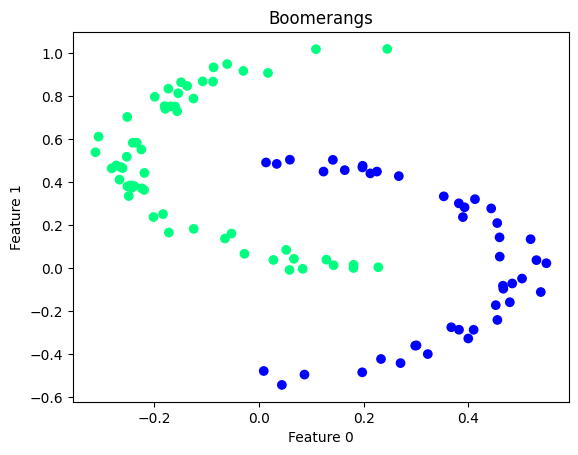

In [8]:
boomerang_dataset = pr.boomerangs()
pr.scatterd(boomerang_dataset)
boomerang_dataset_matrix = +boomerang_dataset
targets = boomerang_dataset.targets

### Excercise 1.4

#### Excercise 1.10

classification error 0.02


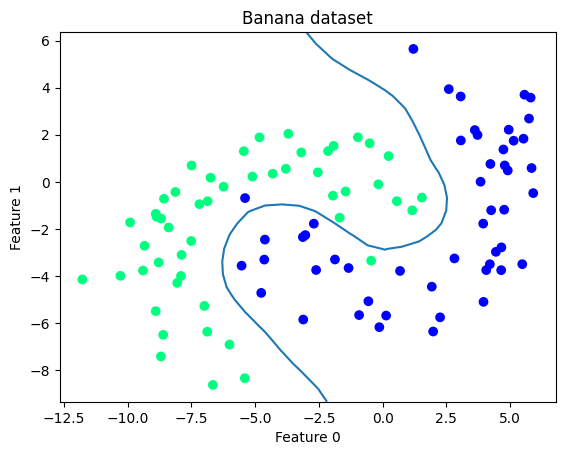

In [7]:
a = pr.gendatb()
w = pr.parzenc()
w.train(a)
pr.scatterd(a)
pr.plotc(w)
b = w.eval(a)
e = pr.testc(b)
print("classification error",e)

### Excercise 1.5

####  Excercise 1.13a

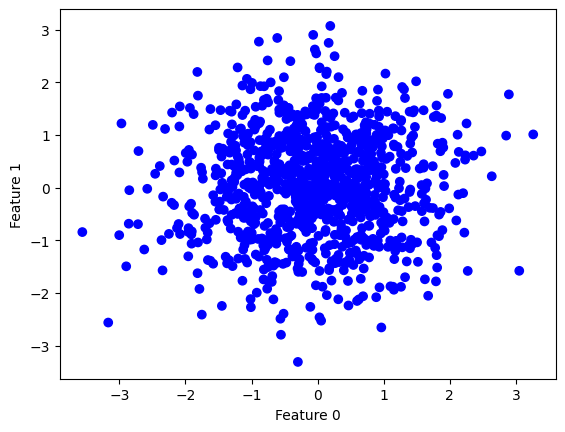

In [8]:
dataset_a = np.random.randn(1000,2)
pr_dataset_a = pr.prdataset(dataset_a)
pr.scatterd(pr_dataset_a)

####  Excercise 1.13b

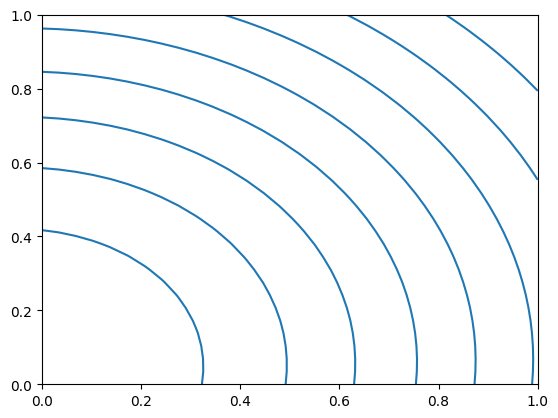

In [9]:
w_classifier = pr.gaussm(pr_dataset_a)
pr.plotm(w_classifier)

####  Excercise 1.15

In [10]:
mean_1 = [4,4]
mean_2 = [10,10]
cov_12 = [[1, 0], [0, 1]]

In [11]:
nmr_points = 10
d1 = np.random.multivariate_normal(mean_1, cov_12, nmr_points)
d2 = np.random.multivariate_normal(mean_2, cov_12, nmr_points)
dataset = np.concatenate((d1, d2))
t1 = [0 for i in d1]
t2 = [1 for i in d2]
targets = np.concatenate((t1, t2))

In [12]:
pr_dataset = pr.prdataset(dataset, targets)
print(pr_dataset)

20 by 2 prdataset with 2 classes: [10 10]


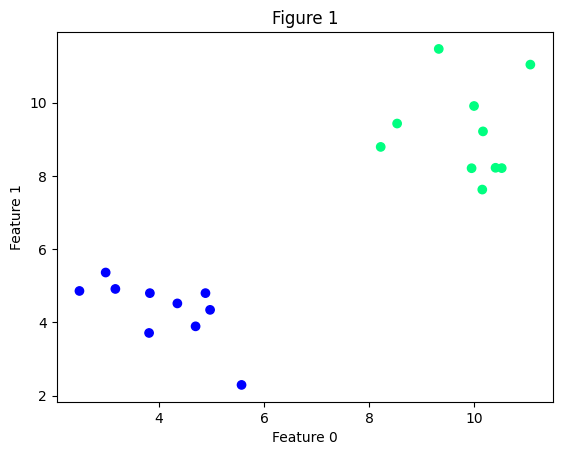

In [13]:
pr.scatterd(pr_dataset)
plt.title("Figure 1")
plt.show()

##### Excercise 1.15a
From figure 1, it can be seen that a linear decision boundary is optimal

##### Excercise 1.15b & 1.15c 

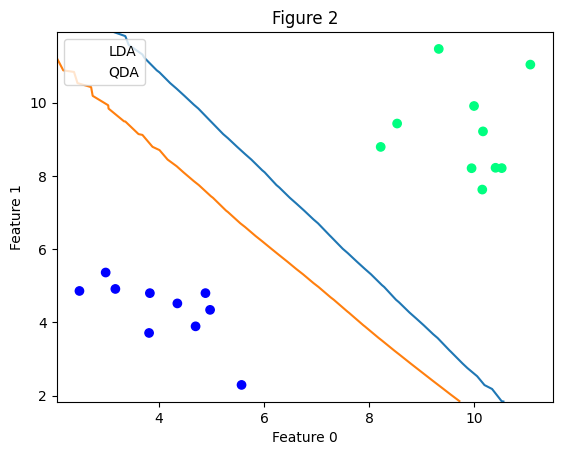

In [14]:
w_linear = pr.ldc()
w_quadratic = pr.qdc()

w_linear.train(pr_dataset)
w_quadratic.train(pr_dataset)

pr.scatterd(pr_dataset)
pr.plotc(w_linear)
pr.plotc(w_quadratic)
plt.legend()
plt.title("Figure 2")
plt.show()

##### Excercise 1.15d
Points will coincide. This can be seen by increasing the number of points i.e nmr_points variable

##### Excercise 1.16

In [15]:
nmr_points_2 = 10
d1 = np.random.rand(10,2)
d2 = np.random.randn(10,2)
dataset_2  = np.concatenate((d1, d2))


t1_2 = [0 for i in d1]
t2_2 = [1 for i in d2]
targets_2 = np.concatenate((t1_2, t2_2))
pr_dataset_2 = pr.prdataset(dataset_2, targets_2)

##### Excercise 1.16a

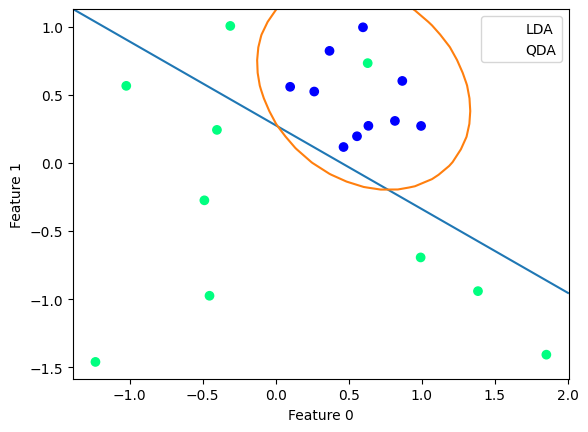

In [16]:
w_linear = pr.ldc()
w_quadratic = pr.qdc()

w_linear.train(pr_dataset_2)
w_quadratic.train(pr_dataset_2)

pr.scatterd(pr_dataset_2)
pr.plotc(w_linear)
pr.plotc(w_quadratic)
plt.legend()
plt.show()

##### Excercise 1.16b

In [17]:
eval_linear = w_linear.eval(pr_dataset_2)
eval_quadratic = w_quadratic.eval(pr_dataset_2)
result_linear = pr.testc(eval_linear)
result_quadratic = pr.testc(eval_quadratic)
print("linear:",result_linear, "quadratic :", result_quadratic)

linear: 0.1 quadratic : 0.05


##### Excercise 1.6

##### Excercise 1.17a

In [18]:
a = pr.gendats([20, 20], 1, 8)

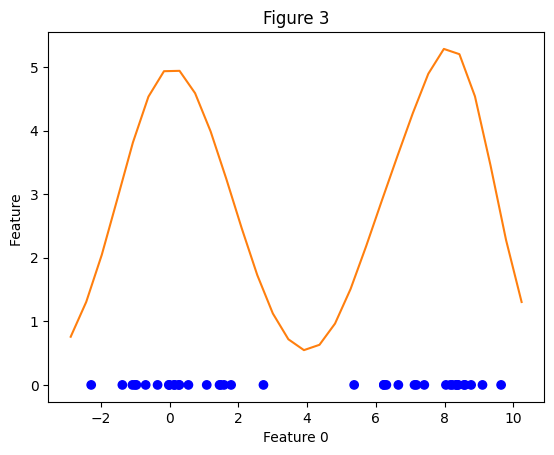

In [19]:
h = 1
a = pr.prdataset(+a)
w = pr.parzenm(a, h)
pr.scatterd(a)
plt.title("Figure 3")
pr.plotm(w)

*From figure 3 it can be seen that the kernels(gaussian in this case) have a standard deviation of approximately 1. Therefore h must be between 1/2 sigma to sigma. I think that 0.5 is the optimal h here just from visual inspection*


##### Excercise 1.18

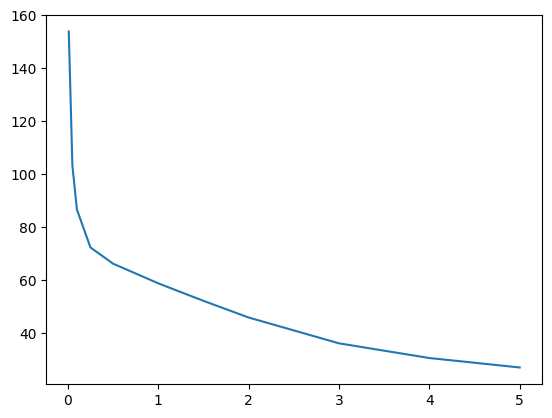

In [20]:
a = pr.gendats([20, 20], 1, 8)
a = pr.prdataset(+a)
hs = [0.01, 0.05, 0.1, 0.25, 0.5, 1, 1.5, 2,3,4,5]
LL = np.zeros(len(hs))
for i in range(len(hs)):
    w = pr.parzenm(a, hs[i])
    c = w.eval(a)
    LL[i] = np.sum(np.log(+(c)))
plt.plot(hs, LL)

*Seems 0.05 gives the maximum log likelihood. Eventhough this is strange this is done on the training dataset*

It is imporant to note that not all features need scaling: Here is a list:
- KNN - Yes 
- Linear regression - no(unless regularized)
- Logistic regression - No(unless regularized)
- Naive Bayes - No
- Decision Trees - No
- Random Forests - No
- AdaBoost - No
- Neural Networks - Yes
- Fisher - No
- NMC - yes

##### Excercise 1.20a

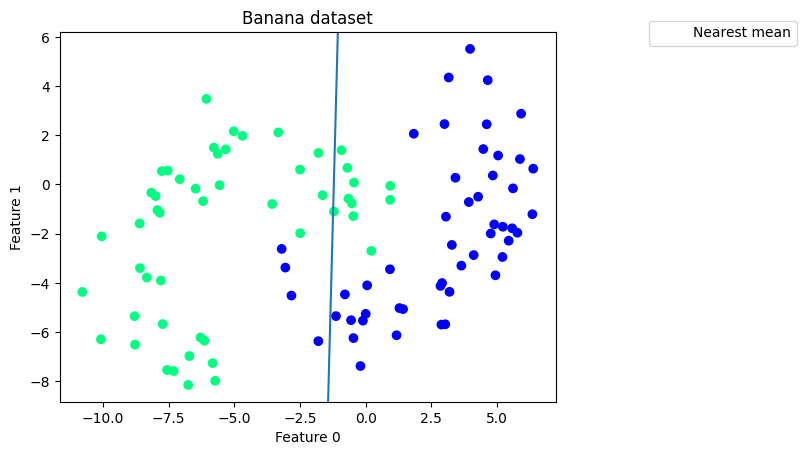

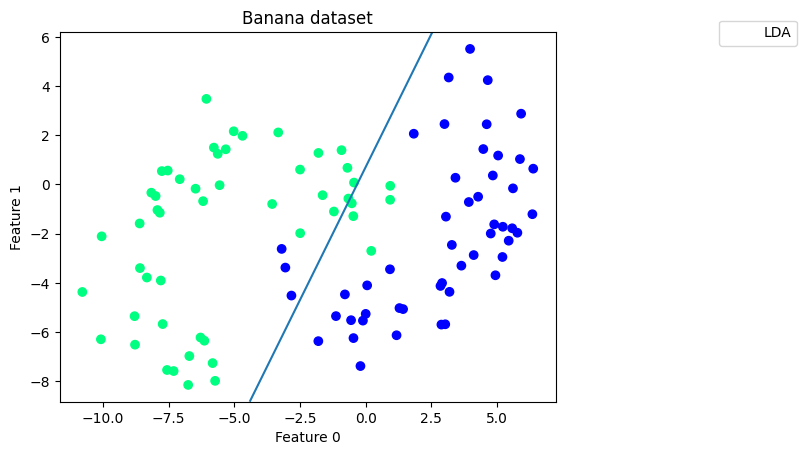

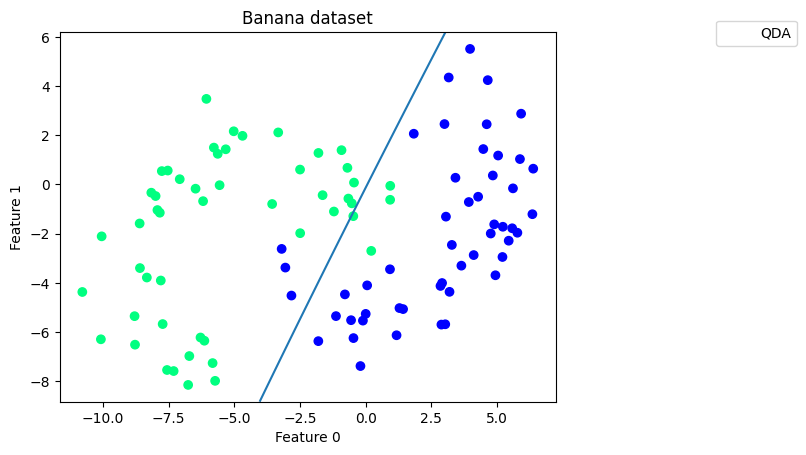

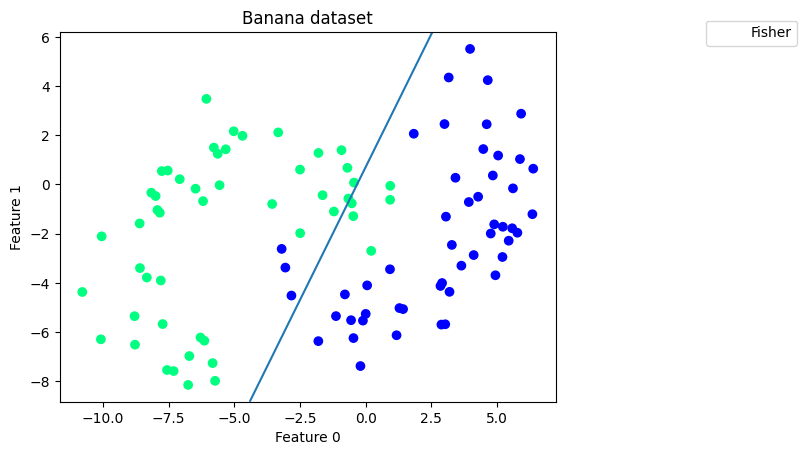

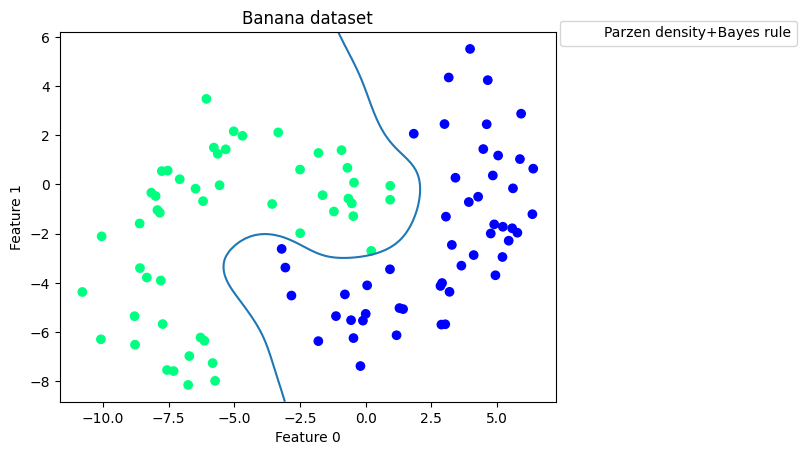

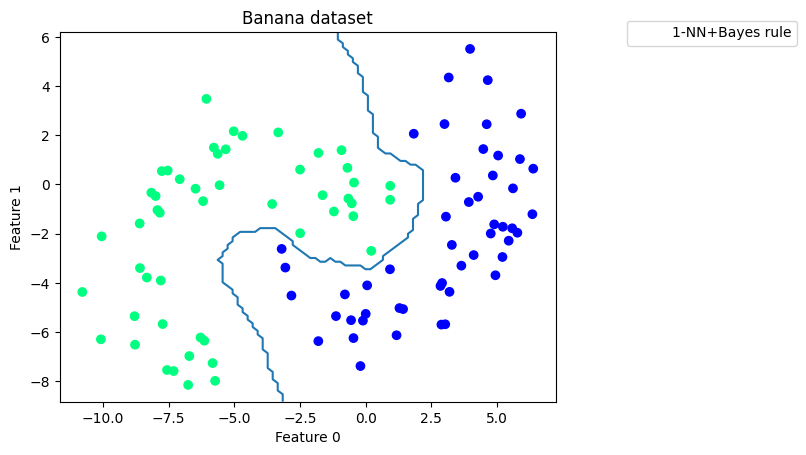

In [21]:
def train(dataset):
    list_classifiers = [pr.nmc(), pr.ldc(), pr.qdc(), pr.fisherc(), pr.parzenc(), pr.knnc(1)]
    for i in range(len(list_classifiers)):
        w = list_classifiers[i]
        w.train(dataset)
        pr.scatterd(dataset)
        pr.plotc(w, gridsize=100)
        plt.legend(bbox_to_anchor=(1.5, 1.05))
        plt.show()

        
gendat_dataset = pr.gendatb()
train(gendat_dataset)

##### Excercise 1.20b

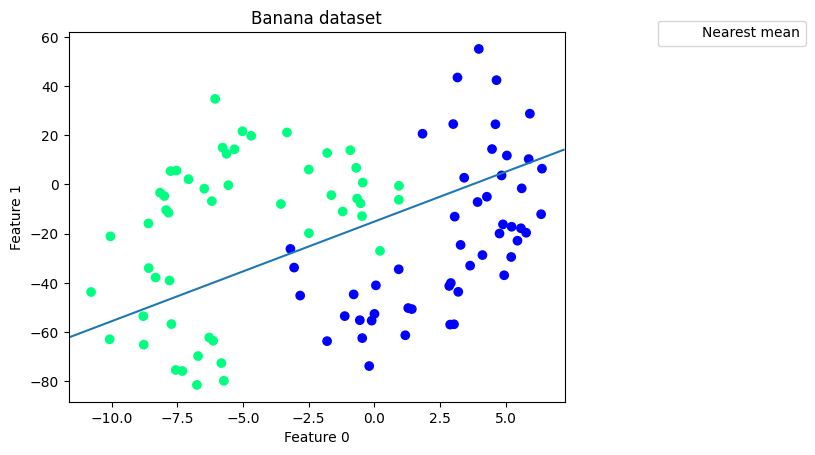

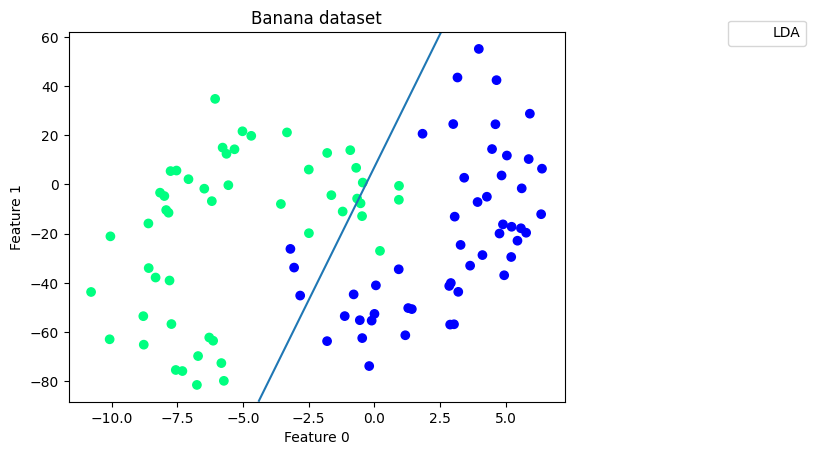

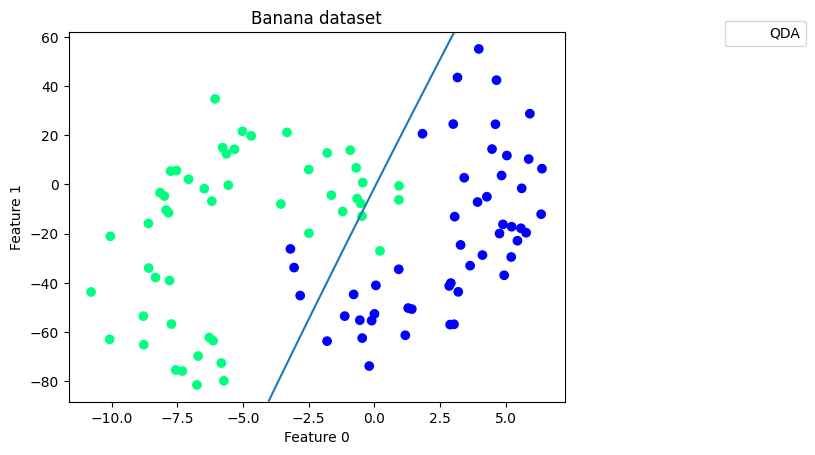

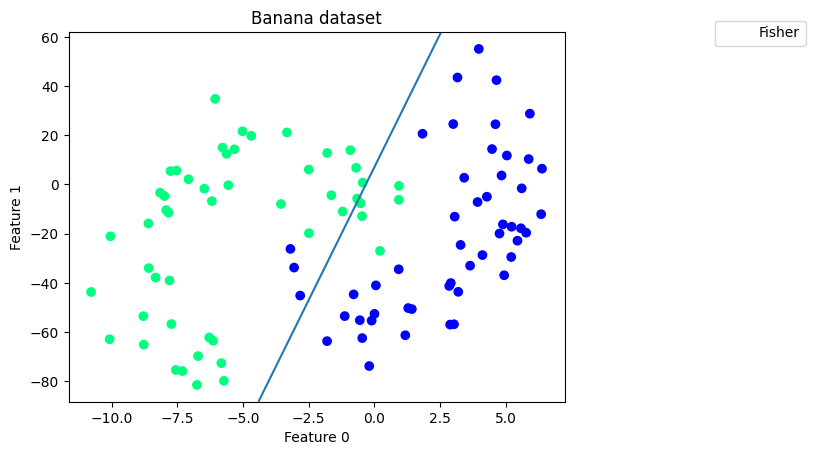

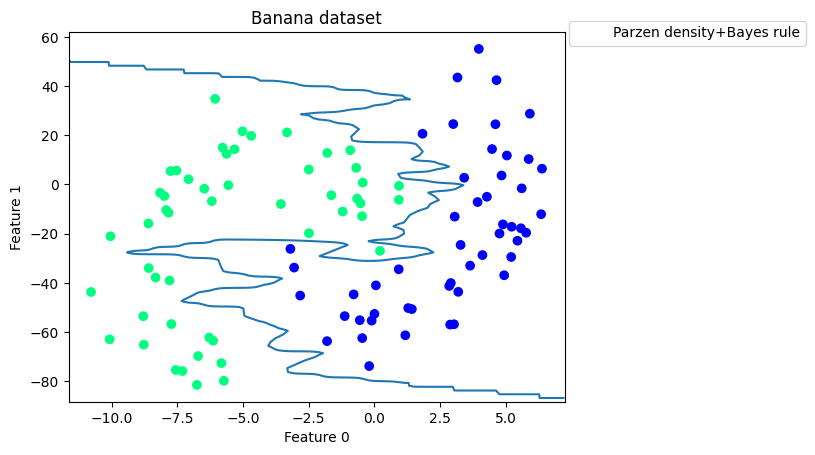

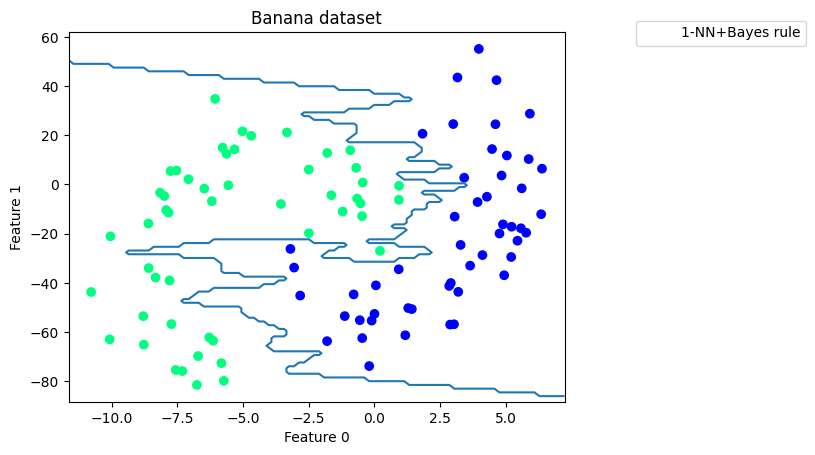

In [22]:
newtrain = gendat_dataset
newtrain[:, [1]]*= 10
train(newtrain)

##### Excercise 1.20c

As you see from the graphs above, nearest mean, k-NN are affected. The reason is that the covariance matrix is estimated for the rest of the classifiers scaling the features. For nearest mean we assume identity covariance and k-NN the distance metric is used which is dependent on feature scaling


##### Excercise 1.20d

I believe this is more of an advantage as you dnt need to scale the features however the training set needs to be large enough to make the estimation of covariance matrix and thus scale reliable

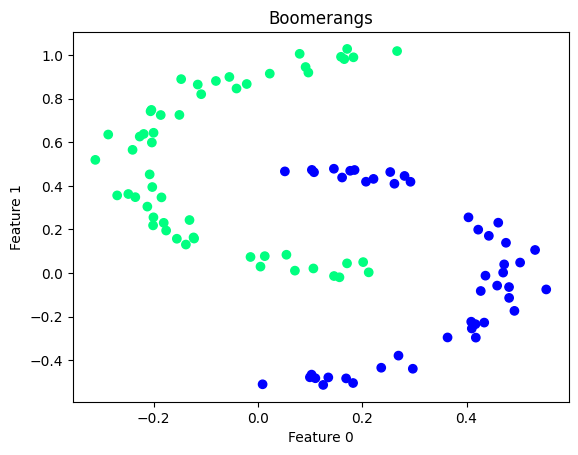

In [9]:
dataset = pr.boomerangs()
pr.scatterd(dataset)